# Classification

## 1. Load Data and Train Model

In [2]:
from sklearn.linear_model import LogisticRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import accuracy_score

dataset = load_dataset('adult')
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

model = LogisticRegression(solver="liblinear")
model.fit(train['X'], train['y'])

y_pred = model.predict(train['X'])

accuracy_score(test['y'], model.predict(test['X']))

0.7959093421779989

In [3]:
from holisticai.utils import BinaryClassificationSurrogate

surrogate = BinaryClassificationSurrogate(train["X"], y_pred, model_type='tree')

y_surrogate = surrogate.predict(train['X'])

In [4]:
from holisticai.explainability.metrics import surrogate_accuracy_difference
# Calculates the accuracy difference between the true labels and the predicted labels from a surrogate model. Lower values indicate a better surrogate model.

surrogate_accuracy_difference(train['y'], y_pred, y_surrogate)

0.0009950248756218638

In [5]:
from holisticai.explainability.metrics import surrogate_accuracy_score
# Calculates the Surrogate Mean Squared Error (MSE) between predicted values and surrogate values. Best value is 1.
 
surrogate_accuracy_score(y_pred, y_surrogate)

0.9943615257048093

In [6]:
from holisticai.explainability.metrics import surrogate_features_stability
# This metric assesses how consistently the features contribute to the predictions of the surrogate model. Best value 1

surrogate_features_stability(train['X'], y_pred, surrogate)

0.6477872234914901

In [7]:
from holisticai.explainability.metrics import surrogate_feature_importances_stability
# This metric assesses how consistently the feature importances contribute to the predictions of the surrogate model. Best value 1

surrogate_feature_importances_stability(train['X'], y_pred, surrogate)

0.995861308584014

In [8]:
from holisticai.explainability.metrics import spread_divergence
# This metric assesses how spread the feature importances are. Best value 0

spread_divergence(surrogate.feature_importances_)

0.11570625076185781

# Tree-Based Metrics

In [9]:
from holisticai.explainability.metrics.tree import tree_number_of_features
# This metric calculates the number of features used in the tree. Lower values are more interpretable.

tree_number_of_features(surrogate)

50

In [10]:
from holisticai.explainability.metrics.tree import tree_number_of_rules
# This metric calculates the number of rules used in the tree. Lower values are more interpretable.

tree_number_of_rules(surrogate)

201

In [11]:
from holisticai.explainability.metrics.tree import tree_depth_variance
# This metric calculates the variance of the tree depth. Lower values are more interpretable.

tree_depth_variance(surrogate)

np.float64(37.388034949629954)

In [12]:
from holisticai.explainability.metrics.tree import weighted_average_depth
# This metric calculates the weighted average depth of the tree. Lower values are more interpretable.

weighted_average_depth(surrogate)

np.float64(10.959162303664922)

In [13]:
from holisticai.explainability.metrics.tree import weighted_average_explainability_score
# This metric calculates the weighted average explainability score of the tree. Lower values are more interpretable.

weighted_average_explainability_score(surrogate)

np.float64(8.88760907504363)

In [14]:
from holisticai.explainability.metrics.tree import weighted_tree_gini
# This metric calculates the weighted tree gini of the tree. Lower values are more interpretable.

weighted_tree_gini(surrogate)

np.float64(0.9781869510638224)

In [15]:
from holisticai.explainability.metrics import classification_surrogate_explainability_metrics
# This function calculates all the metrics for a surrogate model

metrics, surrogate = classification_surrogate_explainability_metrics(train['X'], train['y'], y_pred, surrogate_type='tree', metric_type="all", return_surrogate_model=True)
metrics

,Value,Reference
Surrogate Accuracy Difference,0.000995,0.0
Surrogate Accuracy,0.994362,1.0
Features Stability,0.647787,1.0
Feature Importances Stability,0.995861,1.0
Spread Divergence,0.115706,0.0
Number of Features,50.000000,1.0
Number of Rules,201.000000,1.0
Tree Depth Variance,37.388035,0.0
Weighted Average Explainability Score,8.887609,0.0
Weighted Average Depth,10.959162,0.0


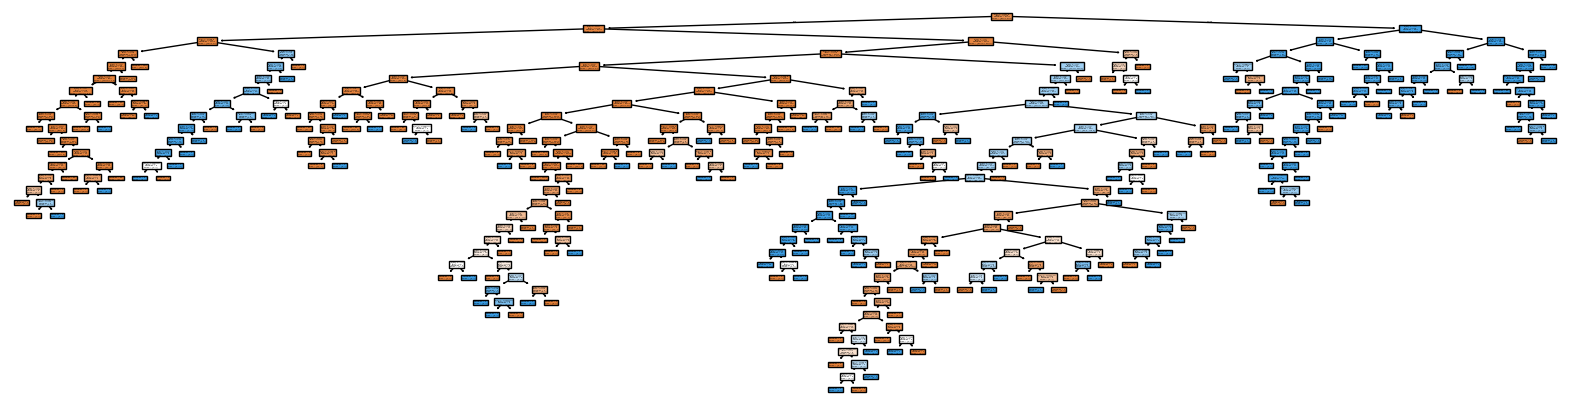

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Plot the surrogate tree

plt.figure(figsize=(20,5))
_ = plot_tree(surrogate._surrogate, filled=True)